In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [4]:
dataset = pd.read_csv("social_network_data.csv")
dataset.drop(columns=['Estimated Salary'], inplace=True)
dataset.head(3)

,Age,Purchase
0,56,0
1,46,0
2,32,0


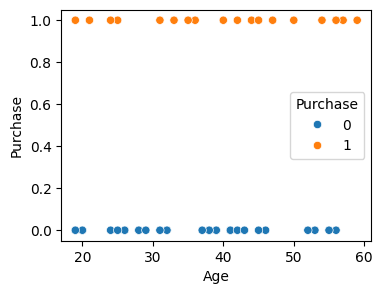

In [8]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='Age', y='Purchase', data=dataset, hue='Purchase')
plt.show()

In [18]:
x = dataset[["Age"]]
y = dataset["Purchase"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=92)


In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [20]:
lr.fit(x_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [21]:
lr.score(x_test, y_test)*100

60.0

In [22]:
lr.predict([[30]])

c:\Users\Vikas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

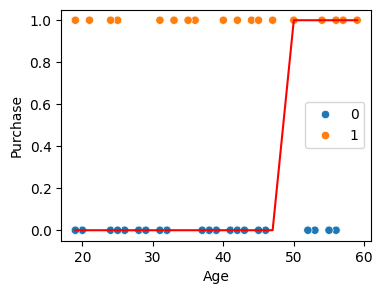

In [23]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='Age', y='Purchase', data=dataset, hue='Purchase')
sns.lineplot(x="Age",y=lr.predict(x),data=dataset, color='red')
plt.show()